# Dimensionality reduction

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA


Import the MNIST data set from OPENML.

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

In [34]:
X = mnist['data']
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
type(X)

pandas.core.frame.DataFrame

Calculate the first two PCs.

In [13]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(70000, 2)

Compute the full set of PCs and extract all up to a cumulative varianve of 95%.

In [11]:
pca_full = PCA()
pca_full.fit(X)

PCA()

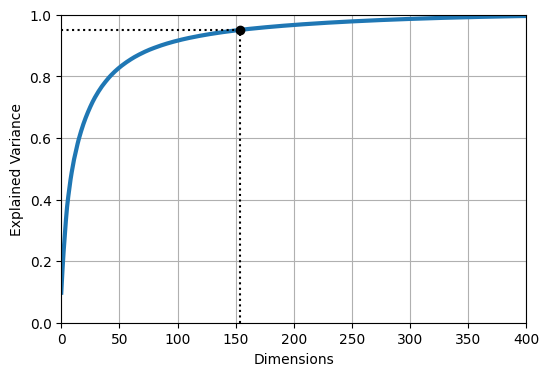

In [24]:
csum = np.cumsum(pca_full.explained_variance_ratio_)

d = np.argmax(csum >= 0.95) + 1

plt.figure(figsize=(6, 4))
plt.plot(csum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Instead of using an index, also the cumulative variance can be directly submitted.

In [25]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)

In [39]:
X_np = X.to_numpy()

KeyError: 0

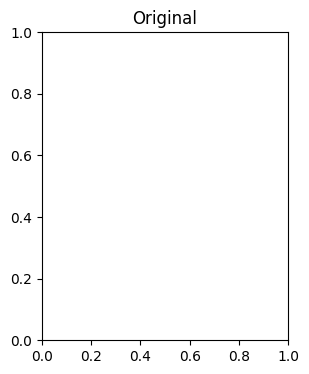

In [40]:
plt.figure(figsize=(7, 4))
for idx, X_np in enumerate((X_np[::2100], X_rec[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X_np[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

# save_fig("mnist_compression_plot")

In [29]:
X.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])